In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import sys
import seaborn as sns

In [81]:


# Try to get the script directory; if in a notebook, use the current working directory
try:
    SCRIPT_DIR = Path(__file__).resolve().parent
except NameError:
    # We are in a notebook/interactive session
    SCRIPT_DIR = Path(os.getcwd()).resolve()

# Adjust this based on where your 'logs' folder is relative to the notebook
# If 'logs' is in the same folder as your notebook, use SCRIPT_DIR
# If 'logs' is one level up, use SCRIPT_DIR.parent
PROJECT_ROOT = SCRIPT_DIR.parent

LOG_FILE = PROJECT_ROOT / "logs" / "critical_k_final.csv"
PLOT_DIR = PROJECT_ROOT / "logs" / "plots"

print(f"Looking for log file at: {LOG_FILE}")

Looking for log file at: /Users/nautilus/gridfw/logs/critical_k_final.csv


In [82]:

def load_data():
    if not os.path.exists(LOG_FILE):
        print(f"Error: Log file not found at {LOG_FILE}")
        sys.exit(1)

    try:
        df = pd.read_csv(LOG_FILE)
        # Clean column names (remove spaces)
        df.columns = df.columns.str.strip()
        return df
    except Exception as e:
        print(f"Error reading CSV: {e}")
        sys.exit(1)


In [83]:
df = load_data()
# Filter acceptable
df = df[(df["Speedup_At_k"] > 0.95) & (df["Speedup_At_k"] < 1.05)]


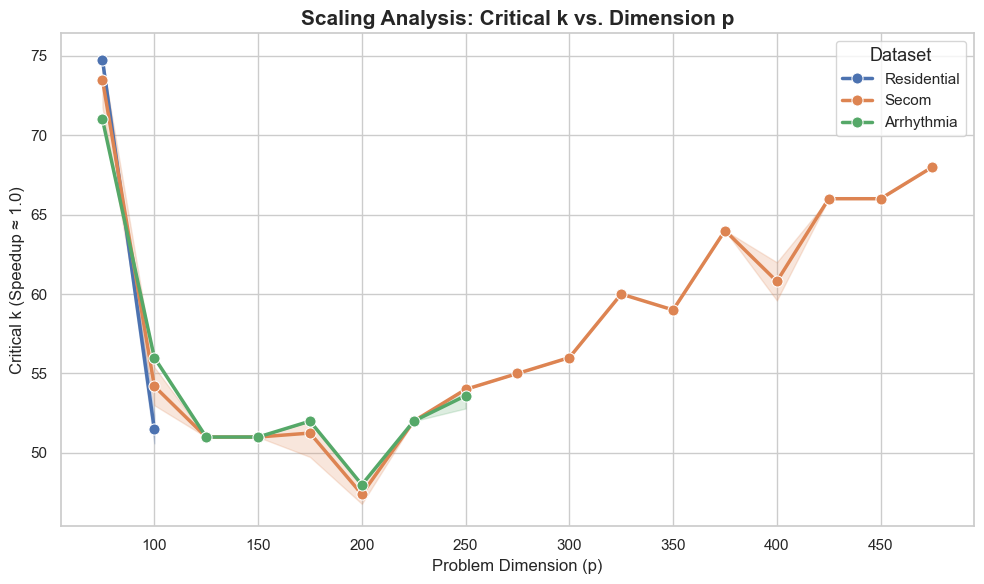

In [84]:


sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 3. Create the Plot
# Grouping by 'Dataset' happens automatically via the 'hue' parameter
plot = sns.lineplot(
    data=df, 
    x='p', 
    y='Final_Critical_k', 
    hue='Dataset', 
    marker='o', 
    linewidth=2.5,
    markersize=8
)

# 4. Annotate and Beautify
plt.title('Scaling Analysis: Critical k vs. Dimension p', fontsize=15, fontweight='bold')
plt.xlabel('Problem Dimension (p)', fontsize=12)
plt.ylabel('Critical k (Speedup ≈ 1.0)', fontsize=12)
plt.legend(title='Dataset', title_fontsize='13', fontsize='11')

# Optional: Force y-axis to start at 0
# plt.ylim(0, df['Final_Critical_k'].max() * 1.1)


plt.tight_layout()

# 5. Save and Show
save_path = PROJECT_ROOT / "logs" / "plots" / "critical_k_scaling.pdf"
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, dpi=300)
plt.show()

    